In [49]:
#importing the needed libraries needed for performing the needed functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# importing the file needed for performing the analysis
scores = pd.read_csv("C:/Users/tkjay/Desktop/student_scores.csv")

In [5]:
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
scores.shape

(25, 2)

In [7]:
# checking whether the dataset is empty or not.
scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

<BarContainer object of 25 artists>

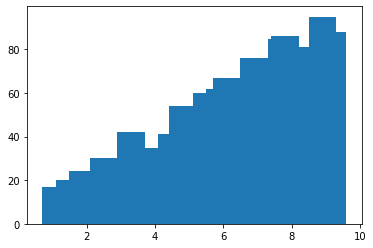

In [16]:
plt.bar(scores.Hours,scores.Scores)

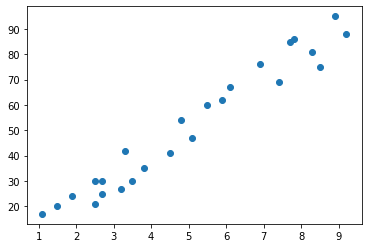

In [47]:
plt.scatter(scores.Hours,scores.Scores)

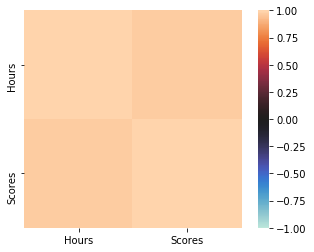

In [128]:
corr = scores.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True
)

In [ ]:
# from the above diagrams we can see that the correct algorithm to implement is LINEAR REGRESSION

### CASE 1. USING LINEAR MODEL WITHOUT TRAIN AND SPLIT METHOD



In [ ]:
from sklearn import linear_model

In [42]:
reg = linear_model.LinearRegression()

In [43]:
reg.fit(scores[["Hours"]],scores.Scores)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
reg.predict([[9.25]])

array([92.90985477])

In [ ]:
# The predicted marks for 9.25 hours is 92.90.

### CASE 2. USING LINEAR MODEL USING TRAIN AND SPLIT METHOD


In [66]:
x = scores[['Hours']]
y = scores.Scores

In [114]:
# Splitting the data as train as test with the ratio of 70:30.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [115]:
y_train.head()

16    30
11    62
6     88
8     81
21    54
Name: Scores, dtype: int64

In [116]:
y_train.shape

(17,)

In [117]:
#Fitting the trained model into the linear regression.

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [118]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
y_pred = lm.predict(x_test)

In [120]:
y_pred

array([36.60769647, 88.60837646, 69.34886535, 84.75647424, 77.05266979,
       28.90389203, 46.23745203, 34.68174536])

In [121]:
data = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred})  
data.head()

,Actual values,Predicted values
4,30,36.607696
15,95,88.608376
23,76,69.348865
3,75,84.756474
10,85,77.052670


In [122]:
hours = 9.25
want_pred = lm.predict([[hours]])

In [123]:
want_pred

array([91.9787909])

In [124]:
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(want_pred[0]))

No of Hours = 9.25
Predicted Score = 91.97879089976603


In [125]:
# The accuracy of the predicted value.

from sklearn.metrics import r2_score

In [127]:
r2_score(y_test,y_pred)

0.9232484359208235